<a href="https://colab.research.google.com/github/RifkiSstwnn/22_Rifki-Setiawan_PCVK_Sem5_2024/blob/main/Rifki%20Setiawan_22_3H_week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, log10
import glob

Gamma Correction pada citra
----------------------------------
Masukkan nilai Gamma: 3


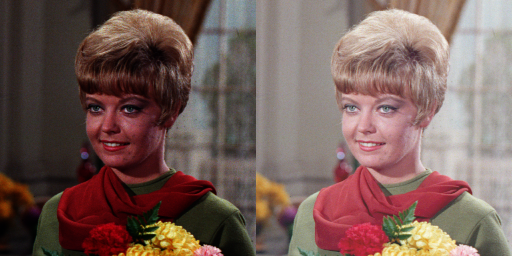

In [77]:
# Meminta input nilai gamma dari pengguna
print('Gamma Correction pada citra')
print('----------------------------------')

try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')
    exit()

# Membaca gambar
image_path = '/content/drive/MyDrive/PCVK/Images/female.tiff'  # Ganti dengan path gambar Anda
image = cv.imread(image_path)

if image is None:
    print("Error: Gambar tidak ditemukan.")
    exit()

# Menentukan ukuran citra dan membuat citra kosong untuk hasil
height, width, channels = image.shape
corrected_image = np.zeros_like(image)

# Melakukan gamma correction dengan perulangan
for y in range(height):
    for x in range(width):
        for c in range(channels):
            # Normalisasi nilai piksel ke rentang [0, 1]
            normalized_value = image[y, x, c] / 255.0
            # Terapkan rumus gamma correction
            corrected_value = ((normalized_value ** (1.0 / gamma)) * 255)
            # Simpan nilai yang sudah dikoreksi ke citra hasil
            corrected_image[y, x, c] = np.clip(corrected_value, 0, 255)

# Menggabungkan gambar asli dan hasil gamma correction secara horizontal
combined_image = cv.hconcat([image, corrected_image.astype(np.uint8)])
cv2_imshow(combined_image)

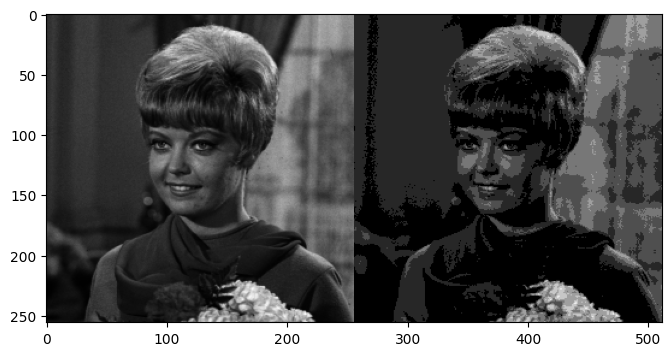

In [78]:
# Membaca citra masukan dalam grayscale
original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff', cv.IMREAD_GRAYSCALE)

if original is None:
    print("Gambar tidak ditemukan. Pastikan path benar.")
    exit()

# Fungsi untuk melakukan kuantisasi citra berdasarkan kedalaman bit
def quantize_image(image, bit_depth):
    level = 255 / (pow(2, bit_depth) - 1)
    quantized_image = (image / level).astype(np.uint8) * level
    return quantized_image

# Menentukan bit-depth yang akan dicoba (misalnya 3-bit)
bit_depth = 3
quantized_image = quantize_image(original, bit_depth)

# Menggabungkan kedua gambar (original dan quantized) secara horizontal
combined_image = np.hstack((original, quantized_image))

# Menampilkan gambar gabungan
plt.figure(figsize=(12, 4))
plt.imshow(combined_image, cmap='gray')

plt.show()

In [79]:
def PSNR(img1, img2):
  mse = np.mean((img1-img2)**2)
  if(mse==0):
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

Average Citra =  5  Nilai PSNR :  19.523615373995767  dB


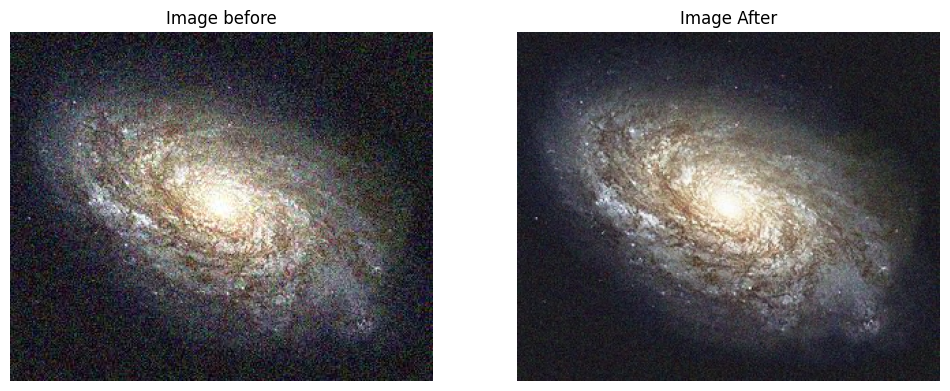

In [82]:
# membaca citra asli
original_img = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')

# membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

denoised_img = np.zeros(cv_img[0].shape)
jmlGambar = 5
for i in range(jmlGambar):
  denoised_img = denoised_img + cv_img[i]
denoised_img = np.uint16(denoised_img/jmlGambar)

psnr = PSNR(original_img,denoised_img)

print('Average Citra = ',jmlGambar,' Nilai PSNR : ', psnr, ' dB')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(cv_img[0], cv.COLOR_BGR2RGB))
plt.title('Image before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(denoised_img, cv.COLOR_BGR2RGB))
plt.title('Image After')
plt.axis('off')

plt.show()

Average Citra =  10  Nilai PSNR :  19.729101120837576  dB


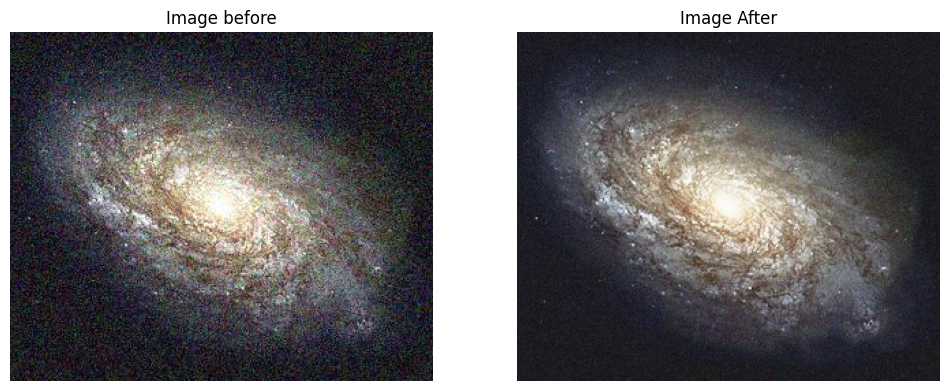

In [86]:
# membaca citra asli
original_img = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')

# membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

denoised_img = np.zeros(cv_img[0].shape)
jmlGambar = 10
for i in range(jmlGambar):
  denoised_img = denoised_img + cv_img[i]
denoised_img = np.uint16(denoised_img/jmlGambar)

psnr = PSNR(original_img,denoised_img)

print('Average Citra = ',jmlGambar,' Nilai PSNR : ', psnr, ' dB')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(cv_img[0], cv.COLOR_BGR2RGB))
plt.title('Image before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(denoised_img, cv.COLOR_BGR2RGB))
plt.title('Image After')
plt.axis('off')

plt.show()

Average Citra =  20  Nilai PSNR :  19.83499072978188  dB


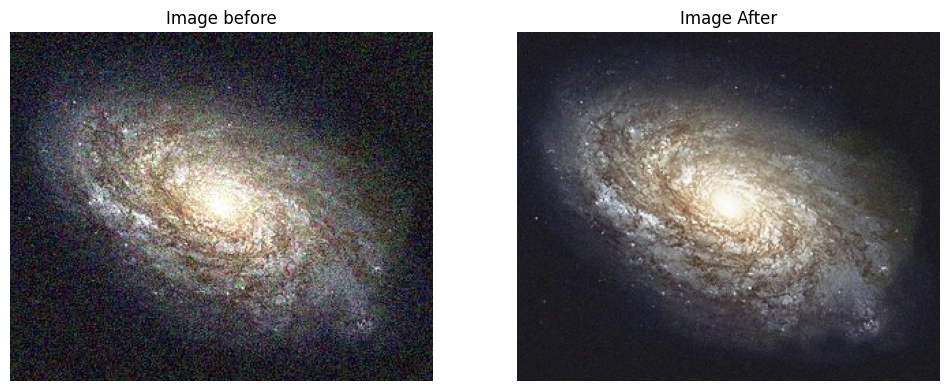

In [85]:
# membaca citra asli
original_img = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')

# membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

denoised_img = np.zeros(cv_img[0].shape)
jmlGambar = 20
for i in range(jmlGambar):
  denoised_img = denoised_img + cv_img[i]
denoised_img = np.uint16(denoised_img/jmlGambar)

psnr = PSNR(original_img,denoised_img)

print('Average Citra = ',jmlGambar,' Nilai PSNR : ', psnr, ' dB')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(cv_img[0], cv.COLOR_BGR2RGB))
plt.title('Image before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(denoised_img, cv.COLOR_BGR2RGB))
plt.title('Image After')
plt.axis('off')

plt.show()

Average Citra =  40  Nilai PSNR :  19.891492053029623  dB


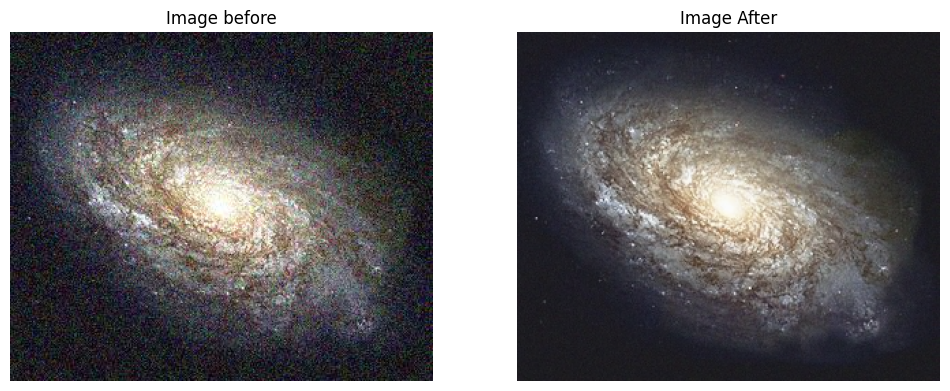

In [84]:
# membaca citra asli
original_img = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')

# membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

denoised_img = np.zeros(cv_img[0].shape)
jmlGambar = 40
for i in range(jmlGambar):
  denoised_img = denoised_img + cv_img[i]
denoised_img = np.uint16(denoised_img/jmlGambar)

psnr = PSNR(original_img,denoised_img)

print('Average Citra = ',jmlGambar,' Nilai PSNR : ', psnr, ' dB')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(cv_img[0], cv.COLOR_BGR2RGB))
plt.title('Image before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(denoised_img, cv.COLOR_BGR2RGB))
plt.title('Image After')
plt.axis('off')

plt.show()

Average Citra =  80  Nilai PSNR :  19.916252973560894  dB


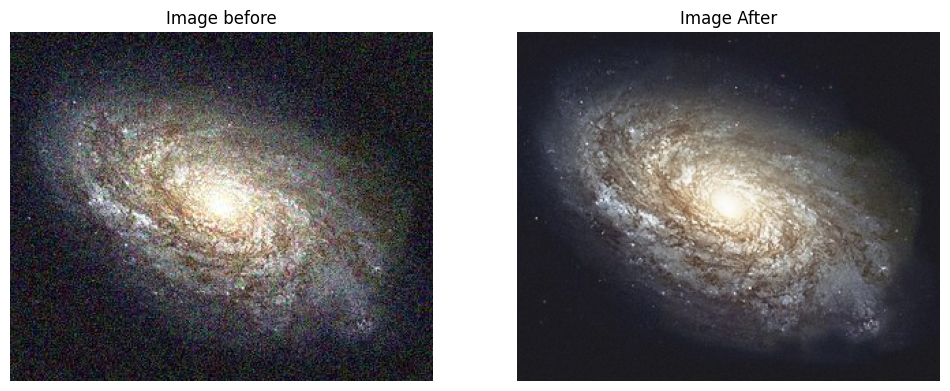

In [83]:
# membaca citra asli
original_img = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')

# membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

denoised_img = np.zeros(cv_img[0].shape)
jmlGambar = 80
for i in range(jmlGambar):
  denoised_img = denoised_img + cv_img[i]
denoised_img = np.uint16(denoised_img/jmlGambar)

psnr = PSNR(original_img,denoised_img)

print('Average Citra = ',jmlGambar,' Nilai PSNR : ', psnr, ' dB')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(cv_img[0], cv.COLOR_BGR2RGB))
plt.title('Image before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(denoised_img, cv.COLOR_BGR2RGB))
plt.title('Image After')
plt.axis('off')

plt.show()

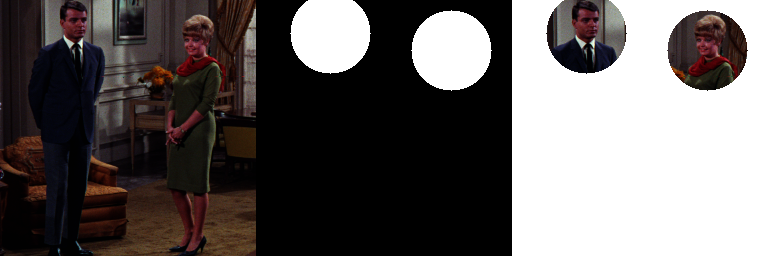

In [90]:
# Membaca gambar
img = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')

# Membuat mask dengan lingkaran berisi warna putih dan latar belakang hitam
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (74, 33), 40, (255, 255, 255), -1)
mask = cv.circle(mask, (195, 50), 40, (255, 255, 255), -1)

# Menggabungkan mask dan gambar asli
result = cv.bitwise_and(img, mask)

# Mengganti area di luar mask menjadi warna putih
result[mask == 0] = 255

# Menggabungkan gambar, mask, dan hasil secara horizontal
final_frame = np.hstack((img, mask, result))

# Menampilkan gambar menggunakan OpenCV
cv2_imshow(final_frame)

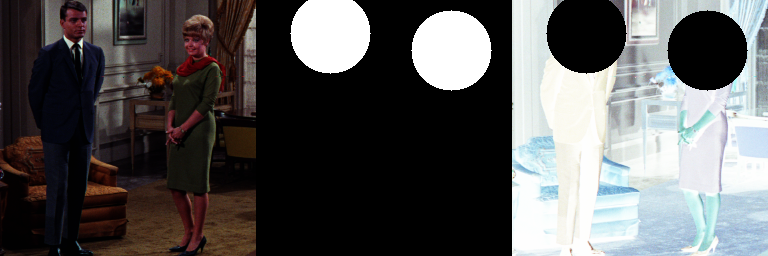

In [101]:
# menggunakan operator not
img = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (74, 33), 40, (255, 255, 255), -1)
mask = cv.circle(mask, (195, 50), 40, (255, 255, 255), -1)


masked = ~img & ~mask

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)

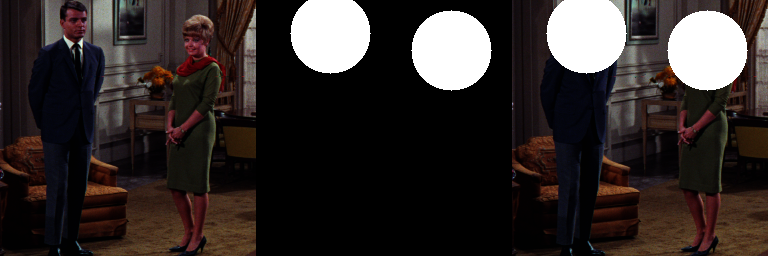

In [100]:
# menggunakan operator or
img = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (74, 33), 40, (255, 255, 255), -1)
mask = cv.circle(mask, (195, 50), 40, (255, 255, 255), -1)

masked = img | mask

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)

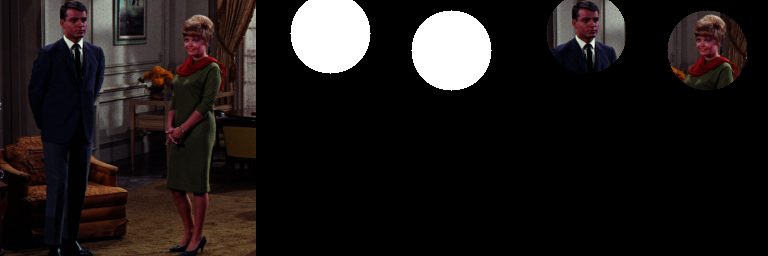

In [99]:
# menggunakan operator and
img = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (74, 33), 40, (255, 255, 255), -1)
mask = cv.circle(mask, (195, 50), 40, (255, 255, 255), -1)

masked = img & mask

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)


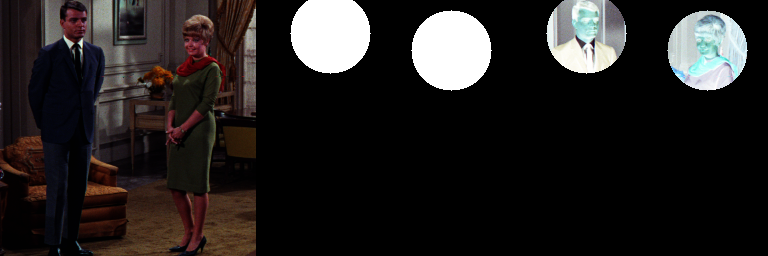

In [97]:
# menggunakan operator not and
img = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (74, 33), 40, (255, 255, 255), -1)
mask = cv.circle(mask, (195, 50), 40, (255, 255, 255), -1)


masked = ~img & mask

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)

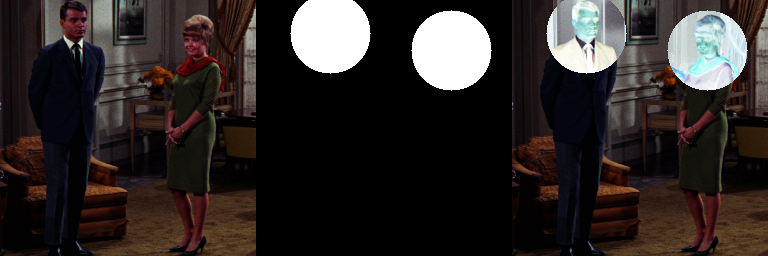

In [98]:
# menggunakan operator xor
img = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (74, 33), 40, (255, 255, 255), -1)
mask = cv.circle(mask, (195, 50), 40, (255, 255, 255), -1)



masked = cv.bitwise_xor(img, mask)

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)